### Cognizant Virtual Experience Program on Forage

# Task 1 - Problem Description 

Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. 

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

Once you’re done with your analysis, we need you to summarize your findings and provide some suggestions as to what else we need in order to fulfill their business problem. Please draft an email containing this information to the Data Science team leader to review before we send it to the client.

Exploratory Data Analysis

In [40]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset using a relative path
df = pd.read_csv('sample_sales_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
print(f' Rows : {df.shape[0]} \n Columns : {df.shape[1]}')
df.head()

 Rows : 7829 
 Columns : 9


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [8]:
# Descriptive Analysis
print("Summary Statistics:")
print(df.describe(include='all'))

print('\n---------------------------------------------------------\n')

# Data Information
print("Data Information:")
print(df.info())

# Check for Null Values
null_values = df.isnull().sum()
print('\n---------------------------------------------------------\n')
print("Null Values in Each Column:")
print(null_values)


Summary Statistics:
                              transaction_id            timestamp  \
count                                   7829                 7829   
unique                                  7829                 7738   
top     a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 19:32:20   
freq                                       1                    2   
mean                                     NaN                  NaN   
std                                      NaN                  NaN   
min                                      NaN                  NaN   
25%                                      NaN                  NaN   
50%                                      NaN                  NaN   
75%                                      NaN                  NaN   
max                                      NaN                  NaN   

                                  product_id category customer_type  \
count                                   7829     7829          7829   
unique   

Data Visualization

In [10]:
import seaborn as sns
import pandas as pd

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    """
    Plot the distribution of a continuous variable.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to plot.
        height (int): The height of the plot.
    """
    _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

def get_unique_values(data, column):
    """
    Display the number of unique values and their counts in a column.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to analyze.
    """
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    """
    Plot the distribution of a categorical variable.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to plot.
        height (int): The height of the plot.
        aspect (int): The aspect ratio of the plot.
    """
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')

def correlation_plot(data: pd.DataFrame = None):
    """
    Plot a correlation heatmap for the given DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
    """
    corr = data.corr()
    corr.style.background_gradient(cmap='coolwarm')


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

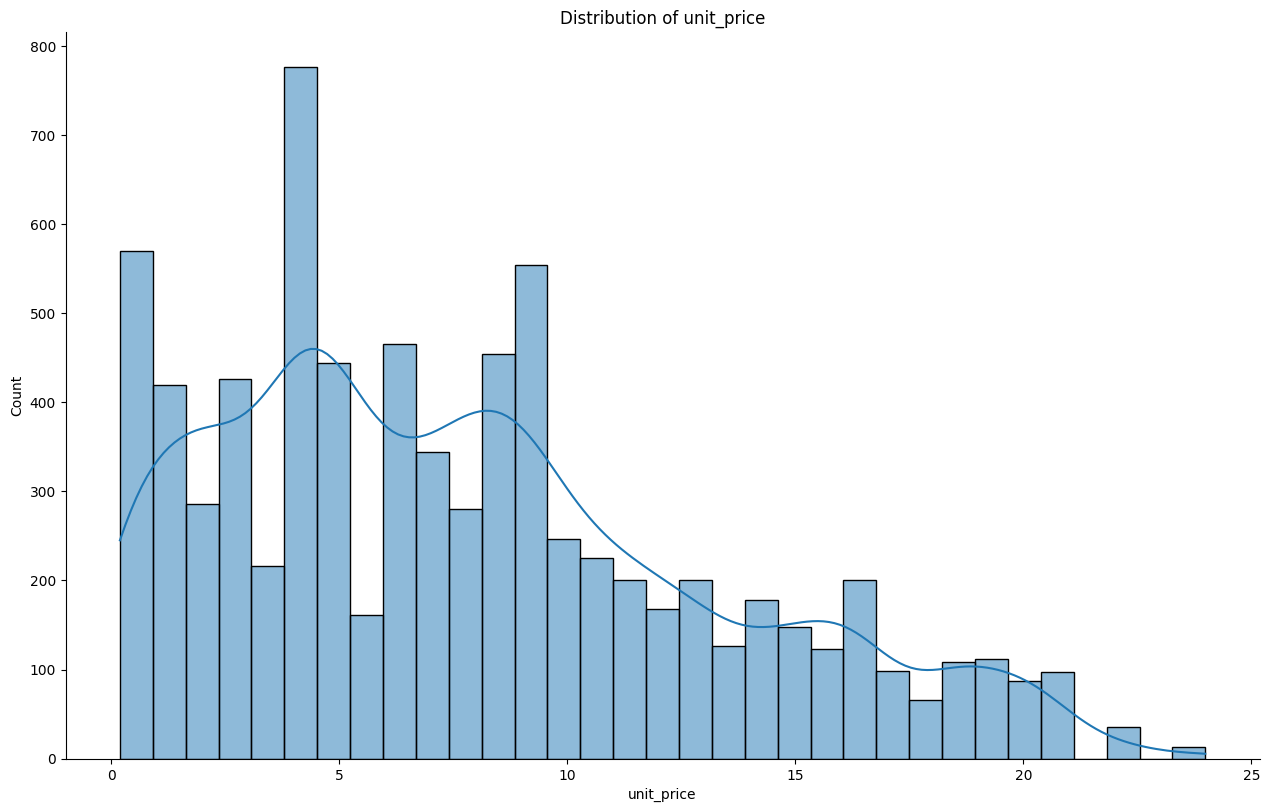

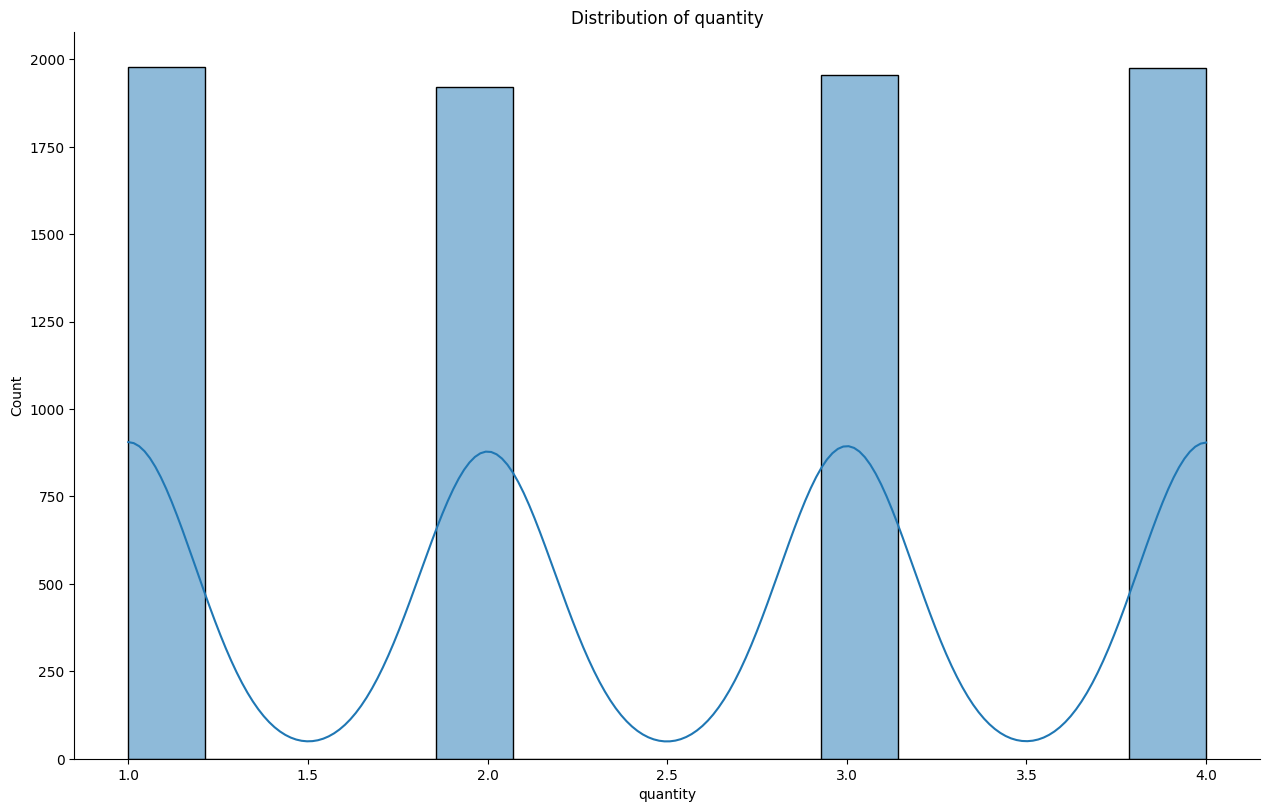

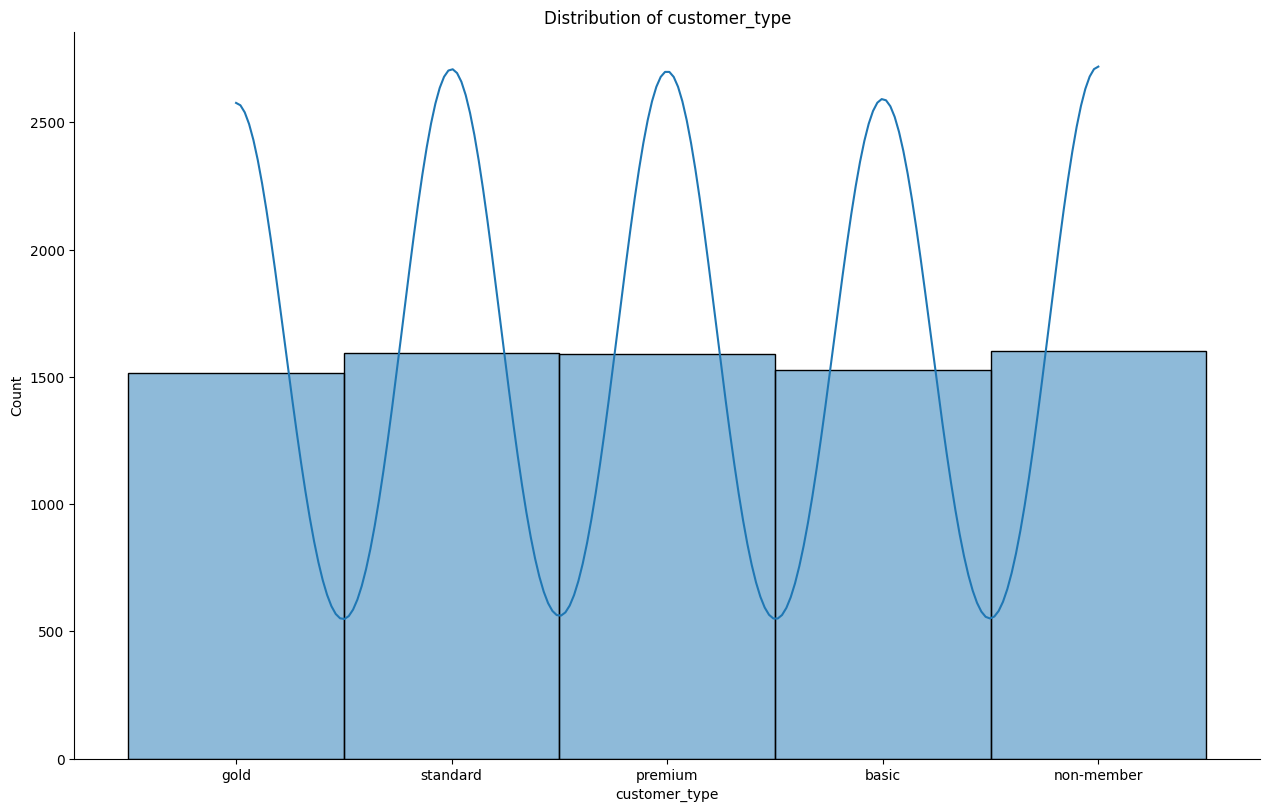

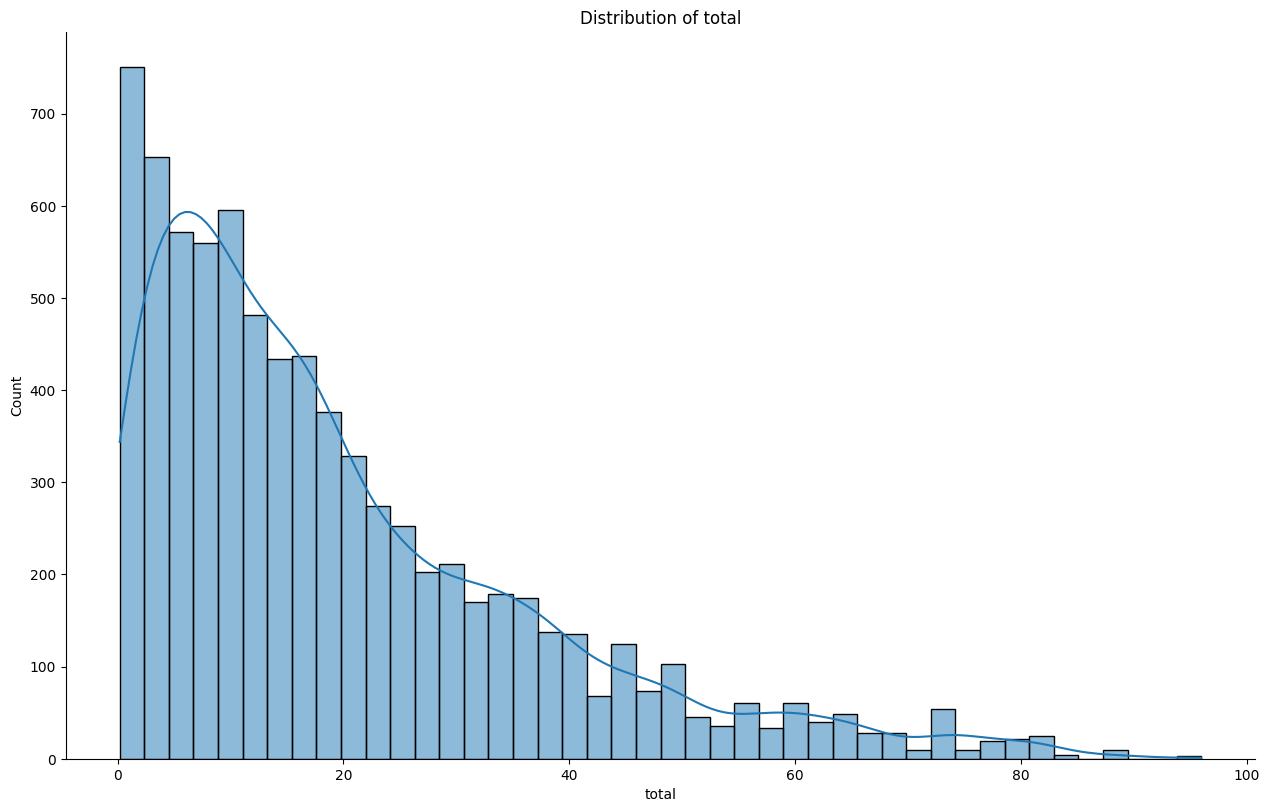

In [11]:
plot_continuous_distribution(df, 'unit_price')
plot_continuous_distribution(df, 'quantity')
plot_continuous_distribution(df, 'total')

In [13]:
# Display unique values and their counts for 'category', 'customer_type', and 'payment_type'
get_unique_values(df, 'category')
get_unique_values(df, 'customer_type')
get_unique_values(df, 'payment_type')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64
Column: customer_type has 5 unique values

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64
Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

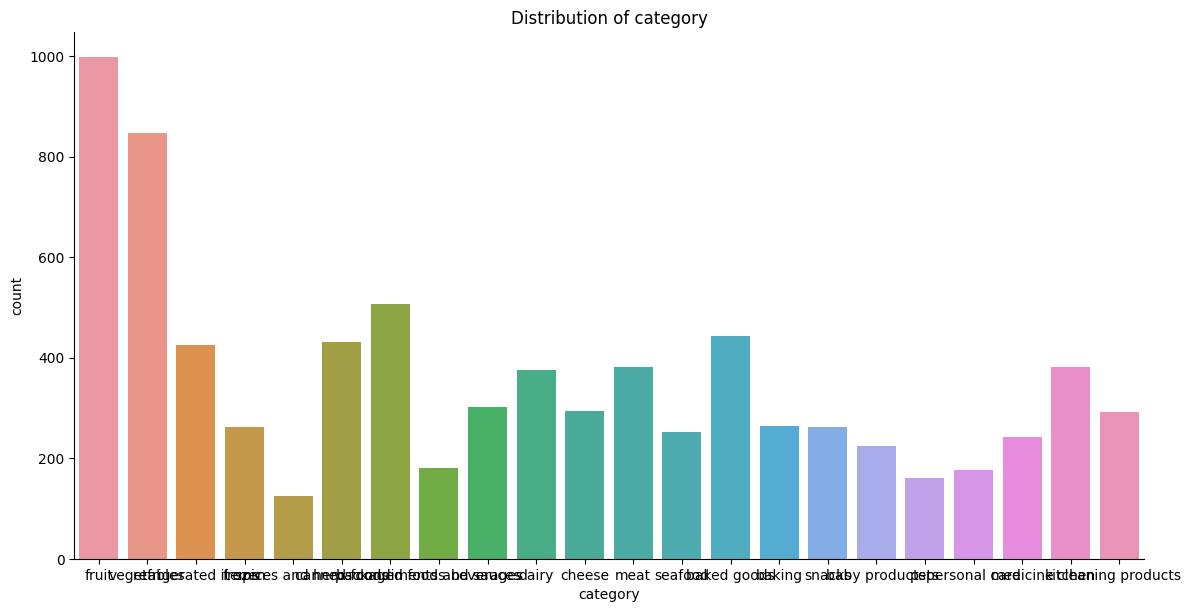

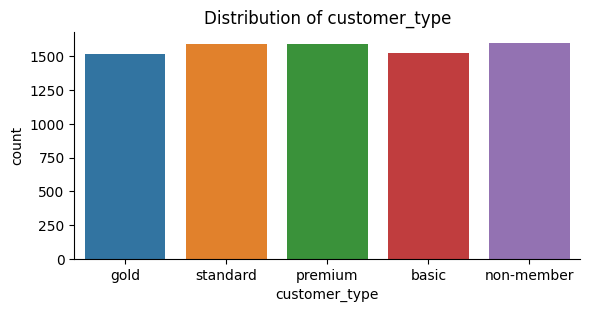

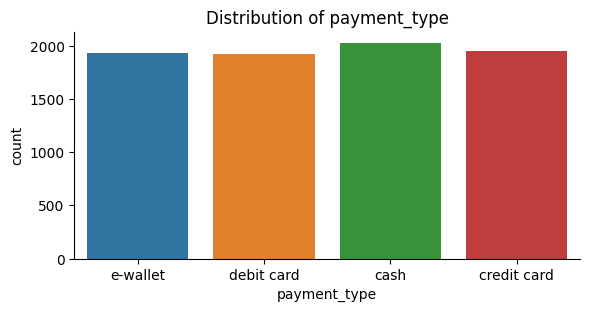

In [15]:
# Create categorical distribution plots
plot_categorical_distribution(df, 'category', height=6, aspect=2)  # Adjust height and aspect as needed
plot_categorical_distribution(df, 'customer_type', height=3, aspect=2)  # Adjust height and aspect as needed
plot_categorical_distribution(df, 'payment_type', height=3, aspect=2)  # Adjust height and aspect as needed


In [28]:
# Check timestamp data format
print(type(df['timestamp']))
df.head(3)

<class 'pandas.core.series.Series'>


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17


In [25]:
# Convert to timeseries
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.head(3)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [27]:
# Separate time by hour

df['hour'] = df['timestamp'].dt.hour
df.head(3)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17


In [30]:
# Check sales on hourly basis

hours = df['hour'].value_counts()
print(f'Top 5 Sale Hours are:\n{hours.head(5)}')


Top 5 Sale Hours are:
hour
11    738
16    730
18    727
10    723
12    721
Name: count, dtype: int64


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


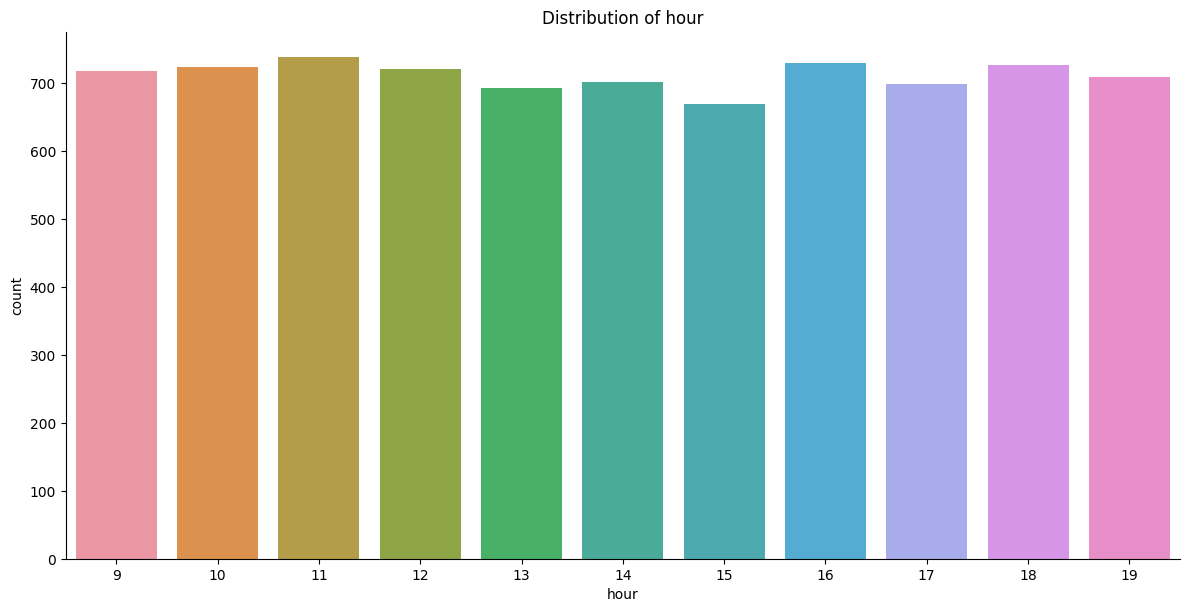

In [37]:
# Distribution of sales over the hours
plot_categorical_distribution(df, 'hour', height=6, aspect=2)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


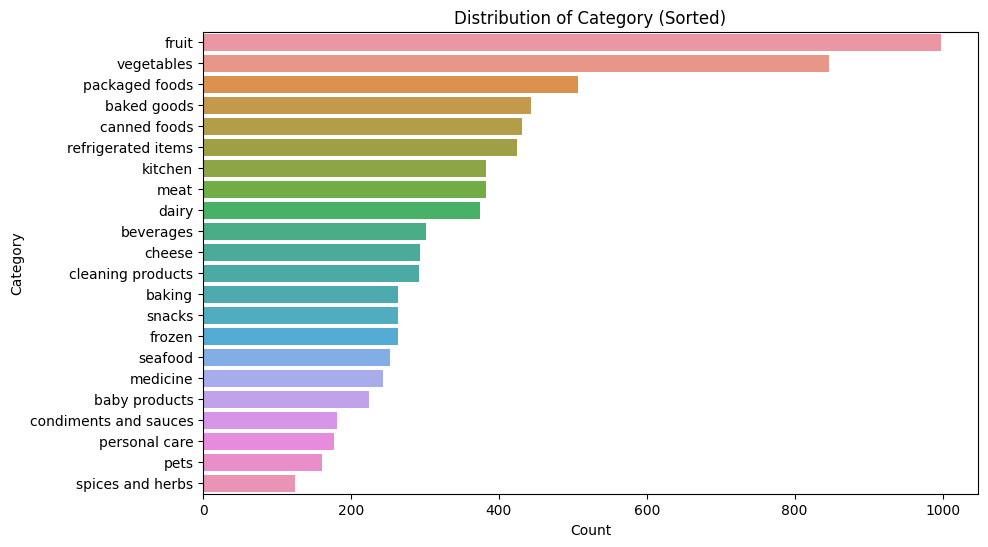

In [42]:
# Sort the DataFrame by the count of each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts = category_counts.sort_values(by='Count', ascending=False)

# Create a bar plot with the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Count', y='Category')
plt.title('Distribution of Category (Sorted)')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

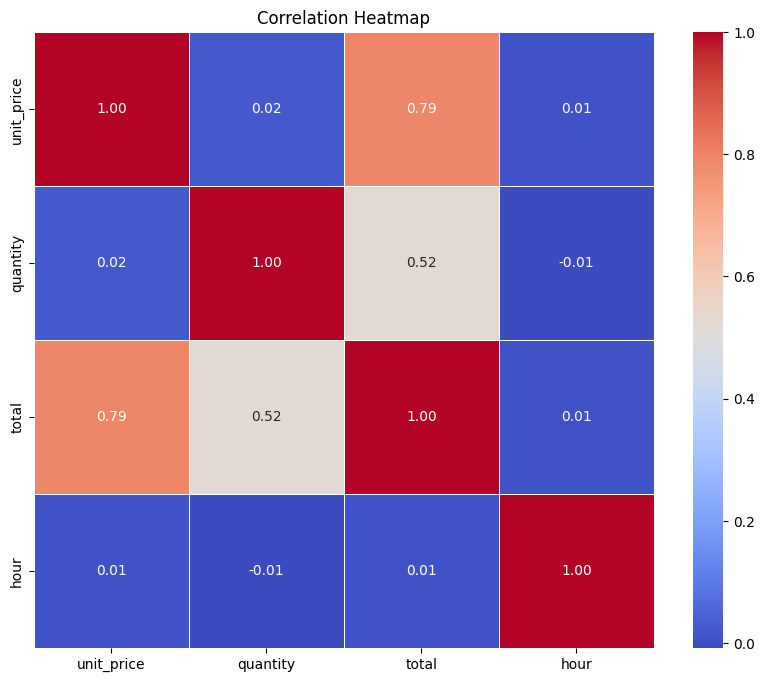

In [47]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Finding correlations and displaying them
cor = numeric_columns.corr()

# Create a heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()